In [1]:
# from dpm.utils import cov
import torch
from dpm.distributions import MixtureModel
from dpm.distributions import Normal, Categorical, GumbelSoftmax, Data
from dpm.visualize import plot_model, plot_models, plot_stats
from pprint import pprint

In [2]:
# test = torch.tensor(X)
# test.expand((10, *test.shape)).shape

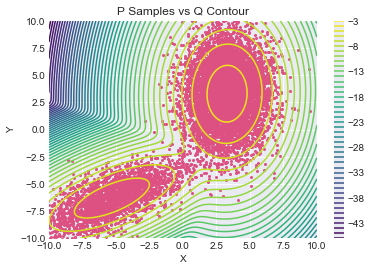

In [3]:
model = MixtureModel([Normal([3.3, 3.3], [2.3, 0.1, 0.1, 7.]), 
                      Normal([-5.3, -6.3], [7, 4.2, 3.1, 3])], [0.75, 0.25])

X = model.sample(10000).detach()
plot_model(model)

In [4]:
from dpm.models import VariationalGaussianMixtureModel

m = VariationalGaussianMixtureModel(n_dims=2)
p = m.parameters()

for i in p:
    pass

Parameter containing:
tensor([-0.9762,  2.2416], requires_grad=True) tensor([[1., 0.],
        [0., 1.]], grad_fn=<MmBackward>)
Parameter containing:
tensor([ 0.1455, -0.2330], requires_grad=True) tensor([[1., 0.],
        [0., 1.]], grad_fn=<MmBackward>)


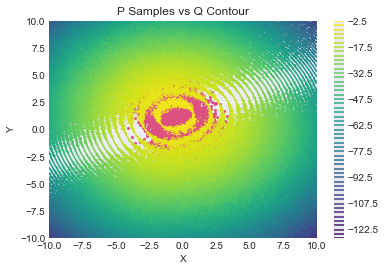

In [5]:



m = VariationalGaussianMixtureModel(n_dims=2)

plot_model(m)
# print(m.model.categorical.probs)
print(m.normals[0].loc, m.normals[0].scale)
print(m.normals[1].loc, m.normals[1].scale)

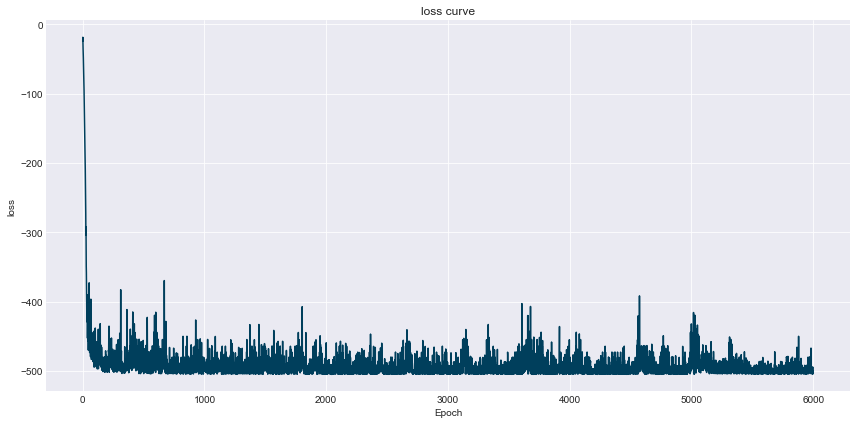

In [6]:
stats = m.fit(X, epochs=6000, track_parameters=False)
plot_stats(stats)

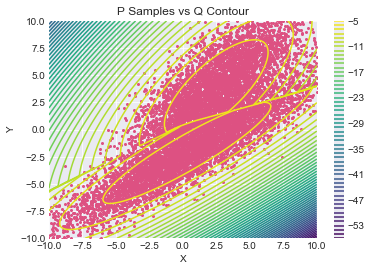

In [7]:
plot_model(m)

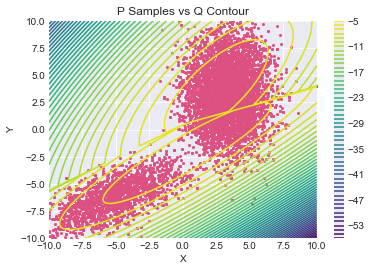

In [8]:
plot_models(Data(X), m)

In [9]:
preds = m.predict(X).numpy()

In [10]:
import numpy as np

one = X[np.where(preds == 1)]
zeros = X[np.where(preds == 0)]

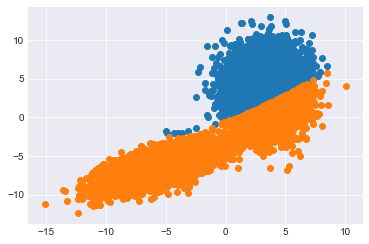

In [11]:
import matplotlib.pyplot as plt

plt.scatter(one[:,0], one[:, 1])
plt.scatter(zeros[:,0], zeros[:,1])

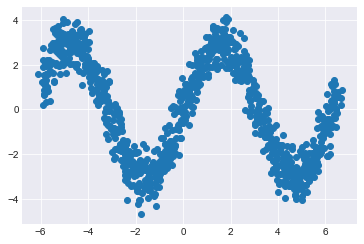

In [12]:
# Parameters
n_samples = 1000

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))
step = 4. * np.pi / n_samples

for i in range(X.shape[0]):
    x = i * step - 6.
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3. * (np.sin(x) + np.random.normal(0, .2))

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Parameter containing:
tensor([0.4229, 0.7203], requires_grad=True) tensor([[1., 0.],
        [0., 1.]], grad_fn=<MmBackward>)
Parameter containing:
tensor([ 1.1814, -1.1081], requires_grad=True) tensor([[1., 0.],
        [0., 1.]], grad_fn=<MmBackward>)


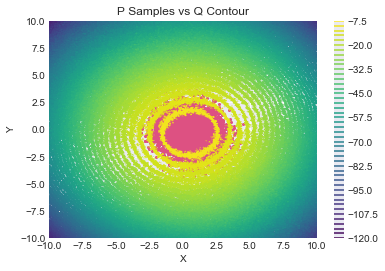

In [13]:
m = VariationalGaussianMixtureModel(n_components=4, n_dims=2)

plot_model(m)
# print(m.model.categorical.probs)
print(m.normals[0].loc, m.normals[0].scale)
print(m.normals[1].loc, m.normals[1].scale)

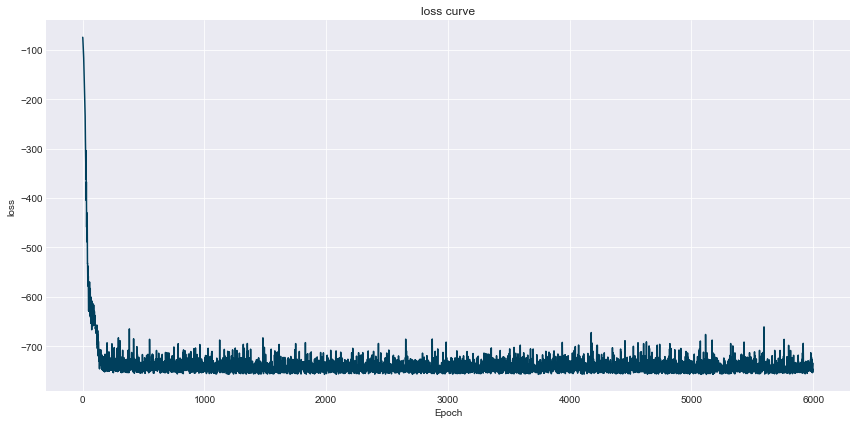

In [14]:
stats = m.fit(X, epochs=6000, track_parameters=False)
plot_stats(stats)
plt.show()

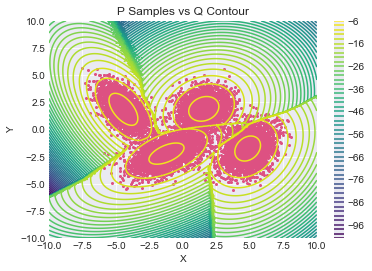

In [15]:
plot_model(m)

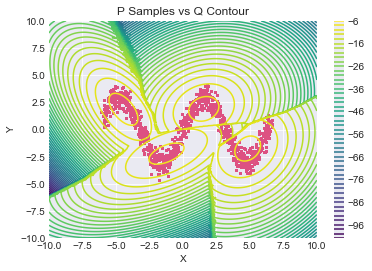

In [16]:
plot_models(Data(X), m)

In [17]:
preds = m.predict(torch.tensor(X).float()).numpy()
collections = [X[np.where(preds == i)] for i in range(m.n_components)]

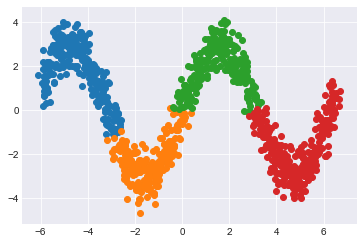

In [18]:
for i in range(m.n_components):
    plt.scatter(collections[i][:,0], collections[i][:, 1])